This notebook presents a simulation of 5000 ms of 400 descending commands and 800 motoneurons from soleus. The force is prduced by a Hill-type muscle model. 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib notebook 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"


import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask

In [2]:
conf = Configuration('confIsometricClosedLoop.rmto')
conf.simDuration_ms = 1000 # Here I change simulation duration without changing the Configuration file.
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [3]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = NeuralTract(conf, 'CMExt')
pools[2] = AfferentPool(conf,'Ia', 'SOL')
ankle = jointAnkleForceTask(conf, pools)
Syn = SynapsesFactory(conf, pools)
del Syn

3586.0
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Descending Command CMExt built
Afferent Pool Ia of muscle SOL built
All the 47980 synapses were built


In [4]:
IaFR = np.zeros([len(t), 1])
tic = time.clock()
for i in xrange(0,len(t)-1): 
    ankle.atualizeAnkle(t[i], 0.03 * np.random.randn((1)))
    pools[1].atualizePool(t[i])
    pools[0].atualizeMotorUnitPool(t[i])
    pools[2].atualizeAfferentPool(t[i], pools[0].spindle.IaFR_Hz)
    IaFR[i] = pools[0].spindle.IaFR_Hz
toc = time.clock()
print str(toc - tic) + ' seconds'


322.799271 seconds


In [5]:
pools[0].listSpikes()
pools[1].listSpikes()
pools[2].listSpikes()

The spike times of the MNs along the 5000 ms of simulation are shown in Fig. \ref{fig:spikesMNHill}.

<IPython.core.display.Javascript object>


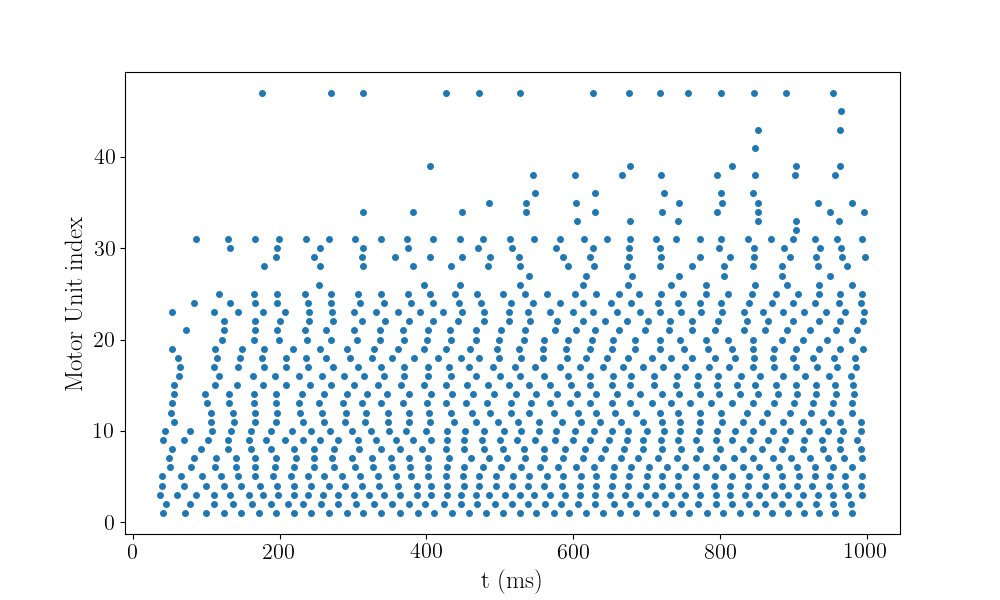

In [6]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
    pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

<IPython.core.display.Javascript object>


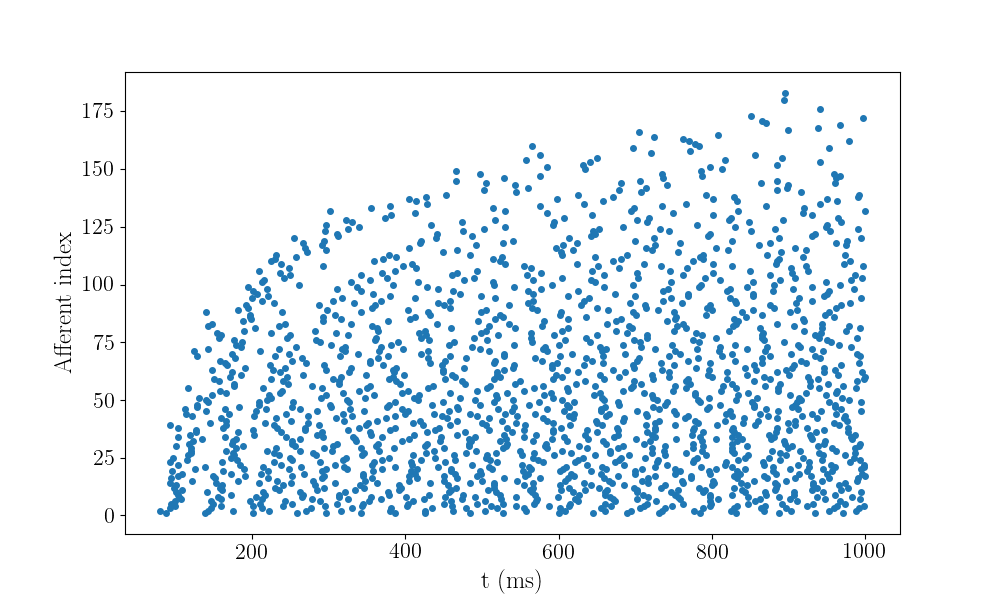

In [7]:
plt.figure()
plt.plot(pools[2].poolTerminalSpikes[:, 0],
    pools[2].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Afferent index')

The muscle force produced by the Hill-type model is shown in Fig.\ref{fig:forceHill}.

<IPython.core.display.Javascript object>


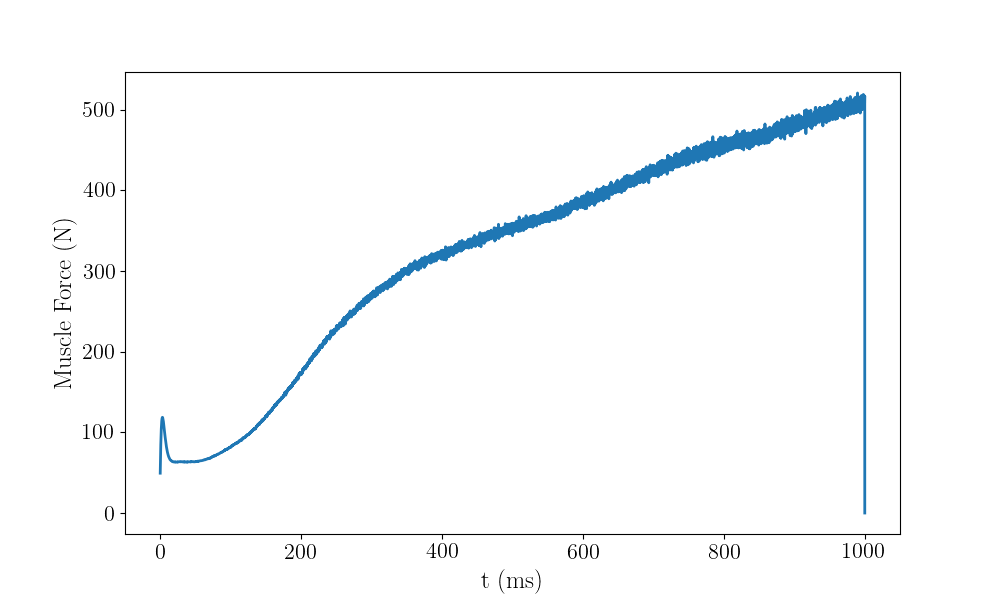

In [8]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

The muscle length computed with the Hill-type model is shown in Fig.\ref{fig:lengthHill}.

<IPython.core.display.Javascript object>


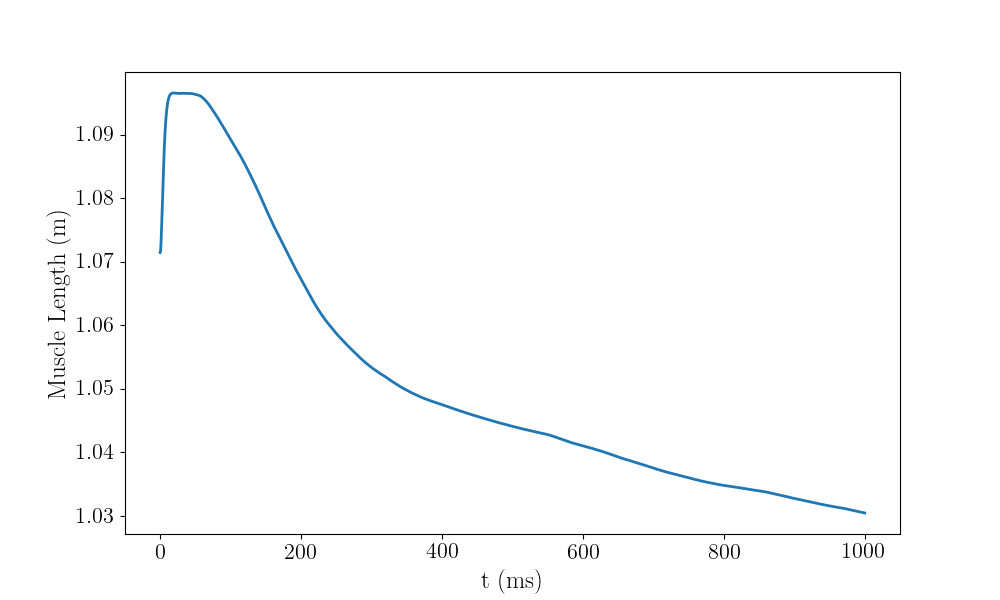

In [9]:
plt.figure()
plt.plot(t, pools[0].Muscle.length_m/pools[0].Muscle.optimalLength_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Length (m)')

The muscle velocity, computed by the Hill-type muscle model, is in Fig.\ref{fig:velocityHill}.

<IPython.core.display.Javascript object>


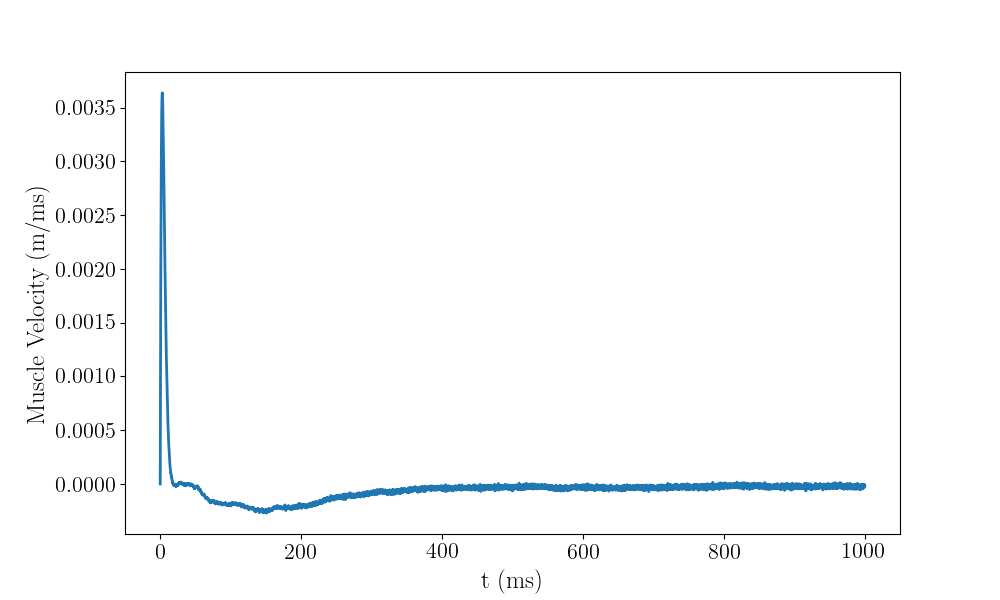

In [10]:
plt.figure()
plt.plot(t, pools[0].Muscle.velocity_m_ms/pools[0].Muscle.optimalLength_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Velocity (m/ms)')

The ankle joint angle is shown in Fig. \ref{fig:ankleAngleHill}.

<IPython.core.display.Javascript object>


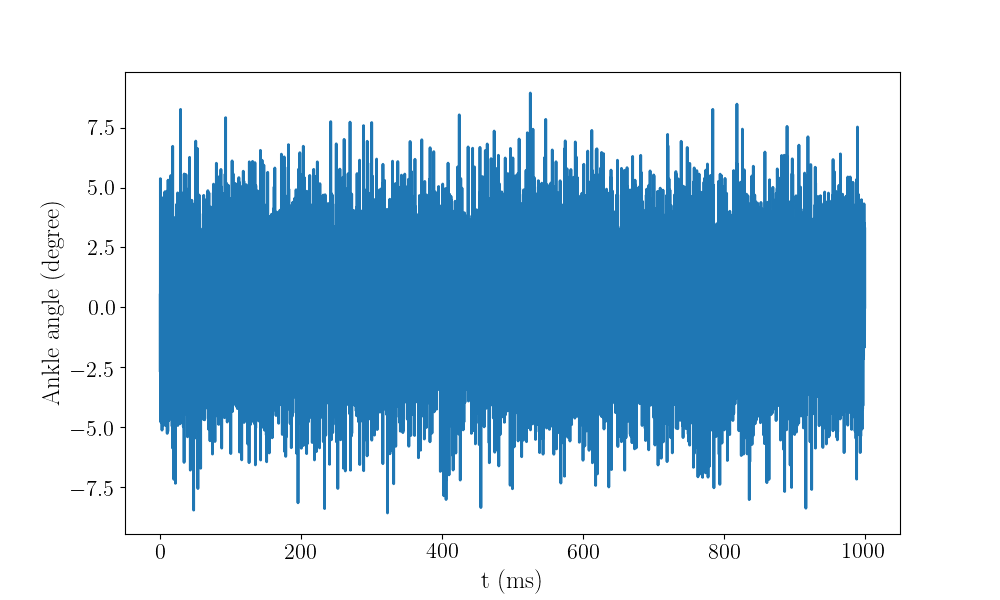

In [11]:
plt.figure()
plt.plot(t, ankle.ankleAngle_rad*180.0/np.pi, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ankle angle (degree)')

<IPython.core.display.Javascript object>


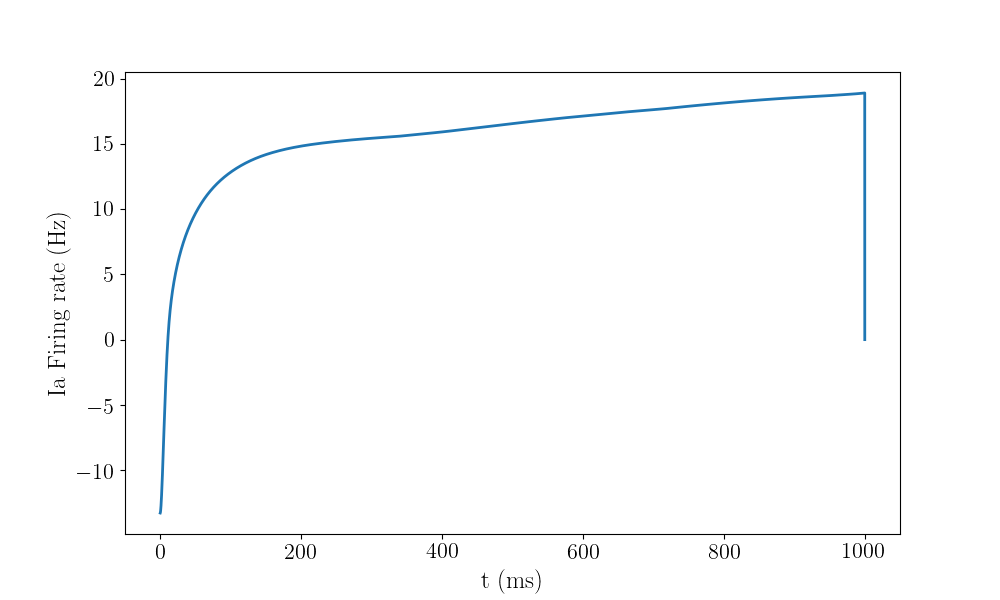

In [14]:
plt.figure()
plt.plot(t, IaFR, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ia Firing rate (Hz)')